In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [5]:
data = pd.read_csv(r'..\data\Churn_Modelling.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA  & Feature Enginnering 

In [6]:
#dropping the unneccessary columns
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- no null values present in dataset

In [8]:
# duplicate check
data.duplicated().sum()

np.int64(0)

- No duplicates present

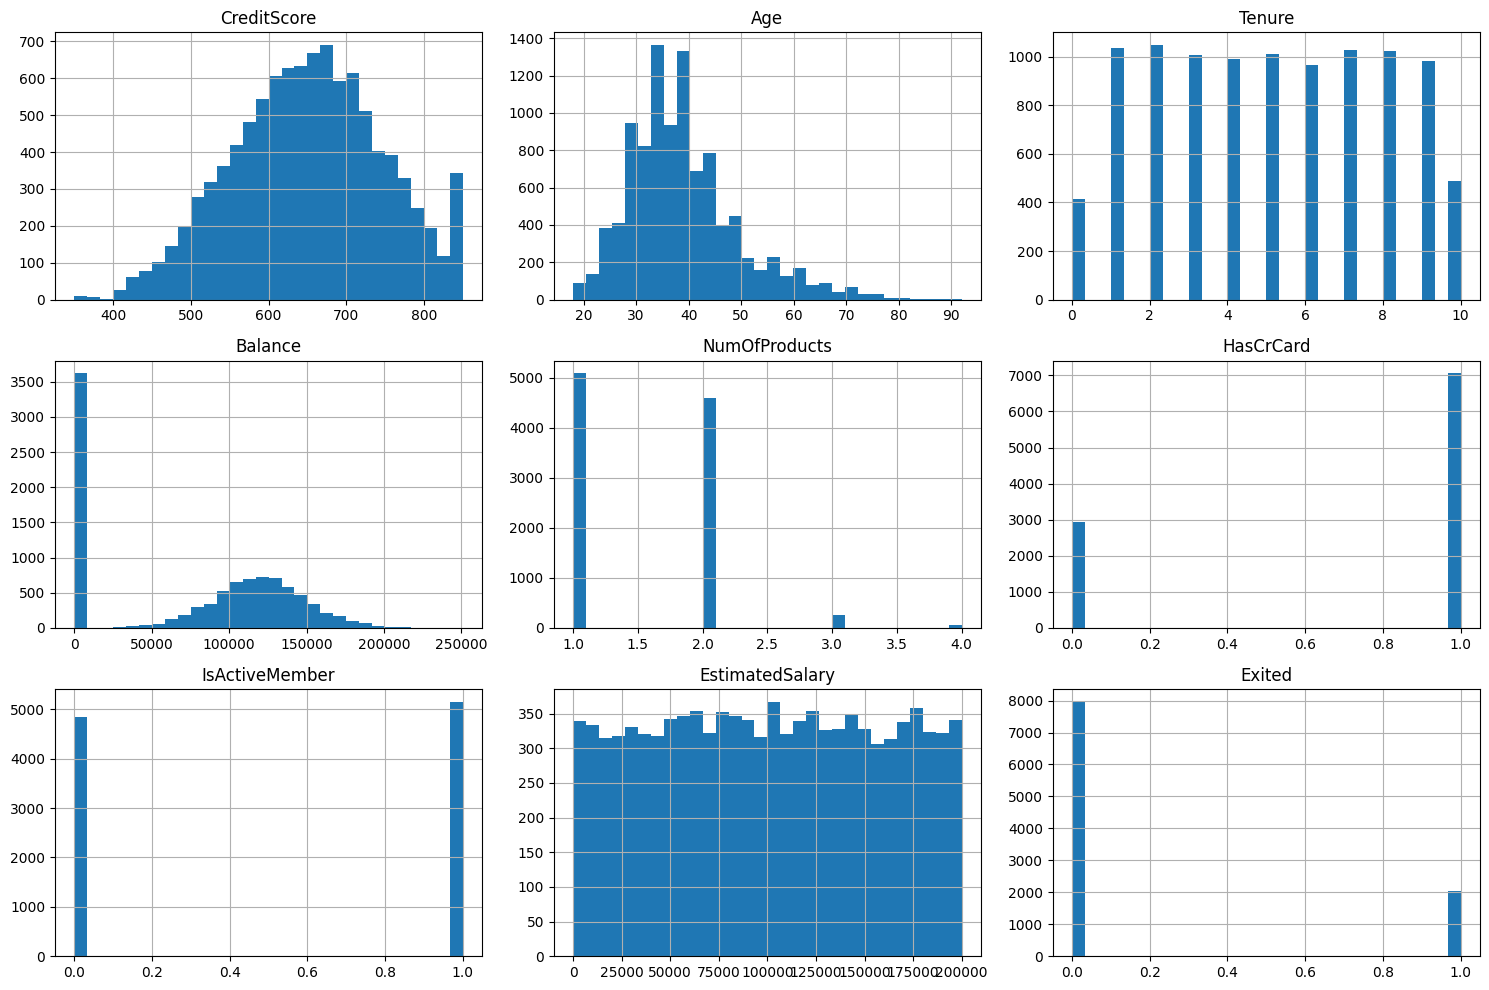

In [13]:
data.hist(bins=30,figsize=(15,10))
plt.tight_layout()
plt.show()


In [14]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Balance', ylabel='Density'>

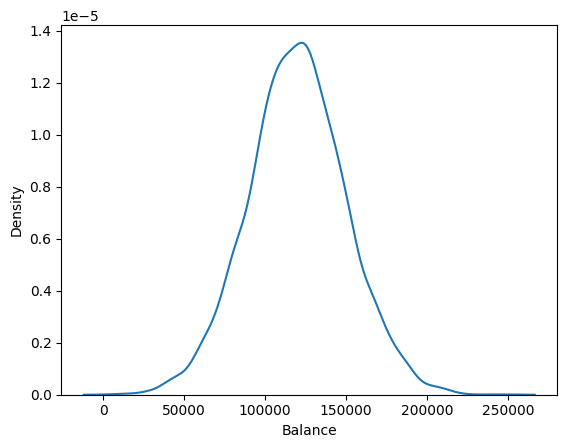

In [19]:
sns.kdeplot(data[data['Balance']>0]['Balance'])

In [27]:
data[data['Balance']==0]['Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

- Distribution of Balane is Bi-modal as people with zero balance are 20% of the data.

In [28]:
x = data.drop(columns=['Exited'])
y=data.Exited

In [29]:
num_columns = x.select_dtypes(exclude='object').columns.tolist()
cat_columns = x.select_dtypes(include='object').columns.tolist()


In [30]:
num_columns,cat_columns

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [31]:
# applying the standard scalar and enconding for category columns

OHE = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
col_trf = ColumnTransformer(transformers=[
    ('scaler',scaler,num_columns),
    ('OneHotEncoder',OHE,cat_columns)
],remainder='passthrough')


In [32]:
# splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)


In [33]:
x_train_trf = col_trf.fit_transform(x_train)
x_test_trf = col_trf.transform(x_test)

In [38]:
x_train_trf

array([[-0.11447092, -1.13742558, -0.69532386, ...,  0.        ,
         0.        ,  1.        ],
       [-0.17699731, -0.18714999, -1.04113324, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56299884, -0.18714999,  1.37953242, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.22942419,  0.38301536, -0.34951448, ...,  0.        ,
         1.        ,  0.        ],
       [-0.60426094, -0.75731534, -1.04113324, ...,  0.        ,
         1.        ,  0.        ],
       [-1.80268331, -1.42250826, -1.04113324, ...,  0.        ,
         1.        ,  0.        ]])

In [51]:
import os
import pickle

# Define the directory and file path
directory = 'models'
file_path = os.path.join(directory, 'column_transformer.pkl')

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the object
with open(file_path, 'wb') as file:
    pickle.dump(col_trf, file)


## ANN implementaion


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [66]:
#ANN model building

model = Sequential([
    Dense(64,activation='relu',input_shape=(x_train_trf.shape[1],)),  #Hidden Layer 1
    Dense(32,activation='relu'),#Hidden layer 2
    Dense(1,activation='sigmoid') #output Layer
])


c:\Users\shiva\OneDrive\Desktop\Customer-Churn-Prediction-Using-ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [69]:
import datetime
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callBack = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [70]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [71]:
history = model.fit(
    x_train_trf,y_train,validation_data=(x_test_trf,y_test),epochs=100,
    callbacks = [tensorflow_callBack,early_stopping_callback]
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7919 - loss: 0.4921 - val_accuracy: 0.8383 - val_loss: 0.3978
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8450 - loss: 0.3824 - val_accuracy: 0.8543 - val_loss: 0.3581
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.3503 - val_accuracy: 0.8593 - val_loss: 0.3512
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3361 - val_accuracy: 0.8617 - val_loss: 0.3481
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3313 - val_accuracy: 0.8570 - val_loss: 0.3499
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3334 - val_accuracy: 0.8573 - val_loss: 0.3450
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3254 - val_accuracy: 0.8547 - val_loss: 0.3475
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3310 - val_accu